In [2]:
import numpy as np

In [6]:
# check rgen.normal

rgen = np.random.RandomState(1)
val = rgen.normal(loc=0.0, scale=0.05, size=3)
print(val)

[ 0.08121727 -0.03058782 -0.02640859]


In [30]:
class Perceptron:
    """Perceptron classifier
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Train data
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [8]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

print("y shape", y.shape)

y shape (100,)


In [25]:
X= df.iloc[:100, [0,2]].values

print("X shape:", X.shape)
print(X[0:5])

X shape: (100, 2)
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


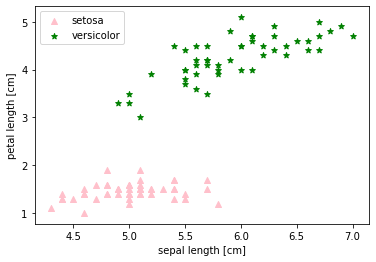

In [26]:
plt.scatter(X[:50, 0], X[:50, 1], color='pink', marker='^', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='green', marker='*', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [66]:
percept = Perceptron(eta=0.1, n_iter=20)

percept.fit(X,y)

In [67]:
print(percept.errors_)
print("len of errors:", len(percept.errors_))

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len of errors: 20


range(1, 21)


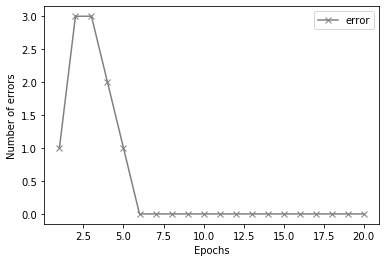

In [68]:
X_axis = range(1, len(percept.errors_) + 1)
print(X_axis)

plt.plot(X_axis, percept.errors_, color='grey', marker='x', label='error')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.legend(loc='upper right')
plt.show()

In [70]:
from matplotlib.colors import ListedColormap
import numpy as np

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
resolution = 2
print(np.unique(y))
print(colors[:len(np.unique(y))])

cmap = ListedColormap(colors[:len(np.unique(y))])

X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print("X1 min:", X1_min, "X1 max:", X1_max, "X2 min:", X2_min, "X2 max:", X2_max)

xx1_r = np.arange(X1_min, X1_max, resolution)
xx2_r = np.arange(X2_min, X2_max, resolution)


print("xx1_r shape:", xx1_r.shape)
print("xx1_r", xx1_r)
print("xx2_r shape:", xx2_r.shape)
print("xx2_r", xx2_r)

xx1, xx2 = np.meshgrid(xx1_r, xx2_r)

print("meshgrided")
print("xx1 shape:", xx1.shape)
print("xx1", xx1)

print("xx2 shape:", xx2.shape)
print("xx2", xx2)

print("xx1.ravel()", xx1.ravel())
print("xx1.ravel() shape", xx1.ravel().shape)
print("xx2.ravel()", xx2.ravel())
print("xx2.ravel() shape", xx2.ravel().shape)

mesh_net_in = np.array([xx1.ravel(), xx2.ravel()]).T
print("mesh_net_in shape:", mesh_net_in.shape)

Z = percept.predict(mesh_net_in)
print("Z shape:", Z.shape)
Z = Z.reshape(xx1.shape)
print("Z shape after reshape:", Z.shape)

[-1  1]
('red', 'blue')
X1 min: 3.3 X1 max: 8.0 X2 min: 0.0 X2 max: 6.1
xx1_r shape: (3,)
xx1_r [3.3 5.3 7.3]
xx2_r shape: (4,)
xx2_r [0. 2. 4. 6.]
meshgrided
xx1 shape: (4, 3)
xx1 [[3.3 5.3 7.3]
 [3.3 5.3 7.3]
 [3.3 5.3 7.3]
 [3.3 5.3 7.3]]
xx2 shape: (4, 3)
xx2 [[0. 0. 0.]
 [2. 2. 2.]
 [4. 4. 4.]
 [6. 6. 6.]]
xx1.ravel() [3.3 5.3 7.3 3.3 5.3 7.3 3.3 5.3 7.3 3.3 5.3 7.3]
xx1.ravel() shape (12,)
xx2.ravel() [0. 0. 0. 2. 2. 2. 4. 4. 4. 6. 6. 6.]
xx2.ravel() shape (12,)
mesh_net_in shape: (12, 2)
Z shape: (12,)
Z shape after reshape: (4, 3)


In [81]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    print(np.unique(y))
    print(colors[:len(np.unique(y))])

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, resolution),
                              np.arange(X2_min, X2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')

[-1  1]
('red', 'blue')


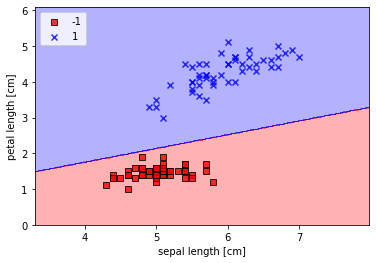

In [82]:
plot_decision_regions(X, y, classifier=percept)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()